<div id="container" style="position:relative;">
<div style="position:relative; float:left"><img style="height:140px, width:280px" src ="images/covid_cover.png" />
</div>
</div>

Combating Covid-19 Misinformation is...

<font color='red'>**Please Note:**</font>
<br>

<font color='red'>**This is notebook 3 of 6**</font> - Each article and twitter dataset will have 3 notebooks each containing a 'Loading & Merging', 'Cleaning & EDA', and a 'Vectorizing and Modeling' notebook.

-------------------------------------------------------------------------------------------------------------------

# Vectorizing & Modeling

In [1]:
# Importing everything we need 
# The usual packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To make our sets
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix

# Scalars
from sklearn.preprocessing import StandardScaler, MinMaxScaler 

# The classifiers 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neural_network import MLPClassifier
from joblib import dump, load
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import itertools

# ML PIPELINES and GridSearch
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Scoring
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Word Extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import FeatureUnion
import nltk
import re
from nltk.corpus import stopwords

# Plot theme for jupyter notebook
from jupyterthemes import jtplot
jtplot.style(theme='onedork')
jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))

# Cell Width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))


# Author: Olivier Grisel <olivier.grisel@ensta.org>
#         Peter Prettenhofer <peter.prettenhofer@gmail.com>
#         Mathieu Blondel <mathieu@mblondel.org>
# License: BSD 3 clause
from pprint import pprint
from time import time
import logging

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')


Automatically created module for IPython interactive environment


# Read in Data Frame

In [2]:
CoAID_df = pd.read_csv('CoAID_df.csv')
CoAID_df.head()

,Unnamed: 0,type,fact_check_url,archive,news_url,news_url2,news_url3,news_url4,news_url5,title,newstitle,content,abstract,publish_date,meta_keywords,label
0,0,post,https://factcheck.afp.com/false-advice-refusin...,https://perma.cc/J4N6-39D5,https://www.facebook.com/photo.php?fbid=551960...,0,0,0,0,Facebook posts shared in at least three countr...,0,0,0,0,0,fake
1,1,article,https://www.politifact.com/factchecks/2020/apr...,0,http://legis.wisconsin.gov/assembly/republican...,0,0,0,0,Wisconsin is Òclearly seeing a decline in COVI...,"""Wisconsin Legislature Takes Gov. Evers to Court""",speaker robin vos r rochester and senate major...,0,0,"""""",fake
2,2,post,https://factcheck.afp.com/posts-claim-children...,https://perma.cc/V4HX-M2XJ,https://www.facebook.com/iAmJessenia/photos/a....,0,0,0,0,Facebook posts claim a child who is infected w...,0,0,0,0,0,fake
3,3,post,https://checkyourfact.com/2020/04/20/fact-chec...,0,https://www.facebook.com/kokernagnews/photos/a...,0,0,0,0,IndiaÕs Ministry of Home Affairs banning citiz...,0,0,0,0,0,fake
4,5,post,https://checkyourfact.com/2020/04/20/fact-chec...,0,https://www.facebook.com/photo.php?fbid=102193...,0,0,0,0,"42 Democratic senators, plus two Independents,...",0,0,0,0,0,fake


In [3]:
features = ['Unnamed: 0', 'fact_check_url', 'archive',
            'news_url2', 'news_url3', 'news_url4', 'news_url5',
            'newstitle','content', 'abstract', 'publish_date', 'meta_keywords','news_url','type']

In [4]:
CoAID_df.drop(features, axis=1, inplace=True)
CoAID_df.head(20)

,title,label
0,Facebook posts shared in at least three countr...,fake
1,Wisconsin is Òclearly seeing a decline in COVI...,fake
2,Facebook posts claim a child who is infected w...,fake
3,IndiaÕs Ministry of Home Affairs banning citiz...,fake
4,"42 Democratic senators, plus two Independents,...",fake
5,The photo of a vaccine for canine coronavirus ...,fake
6,A picture of a reporter in protective medical ...,fake
7,A photo taken by a journalist showing a beach ...,fake
8,News photo from stay-at-home protest was docto...,fake
9,Says a photo shows the ÒSAME EXACT PEOPLEÓ at ...,fake


In [7]:
CoAID_df.shape

(5457, 5)

# MODELING

Set up confusion matrix function taken from sklearn

In [3]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
        """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('RdYlGn')

    plt.figure(figsize=(5, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    #plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.xlabel('Predicted label')
    plt.show()

Create a function to clean the text during our model pipelines

In [4]:
stops = set(stopwords.words("english"))


def cleantext(string):
    text = string.lower().split()
    text = " ".join(text)
    text = re.sub(r"http(\S)+", ' ', text)
    text = re.sub(r"www(\S)+", ' ', text)
    text = re.sub(r"&", ' and ', text)
    tx = text.replace('&amp', ' ')
    text = re.sub(r"[^0-9a-zA-Z]+", ' ', text)
    text = text.split()
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

In [5]:
y = CoAID_df
X = CoAID_df

Split the data into test and training sets

In [6]:
from sklearn.model_selection import train_test_split
# performing a train_test_split to better evaluate our model
# Perform train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,  # Set an 80/20 train and test split
                                                    random_state=1)  # Set a random state for reproducable results

In [13]:
X_train['title'] = X_train['title'].map(lambda x: cleantext(x))
X_test['title'] = X_test['title'].map(lambda x: cleantext(x))

<ipython-input-13-6ec1c96a4494>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['newstitle'] = X_train['newstitle'].map(lambda x: cleantext(x))
<ipython-input-13-6ec1c96a4494>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['title'] = X_test['title'].map(lambda x: cleantext(x))


In [15]:
X_test

,Unnamed: 0,type,fact_check_url,archive,news_url,news_url2,news_url3,news_url4,news_url5,title,newstitle,content,abstract,publish_date,meta_keywords,label
447,489,post,https://www.factcheck.org/2020/03/cattle-vacci...,0,https://www.facebook.com/438419209621747/photo...,0,0,0,0,bovine coronavirus vaccine cattle proof novel ...,0,0,0,0,0,fake
3196,2236,article,webmd.com,0,https://www.webmd.com/lung/news/20200505/coron...,0,0,0,0,coronavirus social nurses behaving badly tiktok,"""Access denied | www.webmd.com used Cloudflare...",this website is using a security service to pr...,0,0,"""""",real
3853,2869,article,sciencedaily.com,0,https://www.sciencedaily.com/releases/2020/07/...,0,0,0,0,compounds halt sars cov 2 replication targetin...,"""""",0,0,0,"""""",real
1953,1028,article,webmd.com,0,https://www.webmd.com/lung/news/20200320/hong-...,0,0,0,0,hong kong spike coronavirus cases,"""Hong Kong Has Spike in Coronavirus Cases""",march 20 2020 -- a record one day spike of 48 ...,the 48 cases represent about a quarter of all ...,0,"""coronavirus, covid-19, hong kong, infections,...",real
4359,3375,article,cdc.gov,0,https://www.cdc.gov/coronavirus/2019-ncov/hcp/...,0,0,0,0,criteria return work healthcare personnel conf...,"""Coronavirus Disease 2019 (COVID-19)""",who this is for occupational health programs a...,find guidance for occupational health programs...,2/11/20,"""when can a doctor with COVID-19 go back to wo...",real
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3982,2998,article,webmd.com,0,https://www.webmd.com/lung/news/20200827/one-p...,0,0,0,0,fewer severe asthma attacks kids covid,"""Access denied | www.webmd.com used Cloudflare...",this website is using security service to prot...,0,0,"""""",real
2705,1745,article,sciencedaily.com,0,https://www.sciencedaily.com/releases/2020/06/...,0,0,0,0,levels sars cov 2 rna sewage rose covid 19 cas...,"""""",0,0,0,"""""",real
3093,2133,article,webmd.com,0,https://www.webmd.com/lung/news/20200601/mass-...,0,0,0,0,mass protests could cause covid 19 outbreaks,"""Access denied | www.webmd.com used Cloudflare...",this website is using a security service to pr...,0,0,"""""",real
2869,1909,article,medicalnewstoday.com,0,https://www.medicalnewstoday.com/articles/bloo...,0,0,0,0,antibody sars survivor blood neutralizes new,"""Antibody from SARS survivor's blood neutraliz...",an antibody that scientists first identified i...,scientists conclude that an antibody that they...,0,"""""",real


In [14]:
X_train

,Unnamed: 0,type,fact_check_url,archive,news_url,news_url2,news_url3,news_url4,news_url5,title,newstitle,content,abstract,publish_date,meta_keywords,label
703,754,post,https://www.politifact.com/factchecks/2020/may...,0,,0,0,0,0,barack obama first ex president ever speak suc...,,detected javascript disabled browser would lik...,0,0,"""""",fake
823,874,post,https://www.politifact.com/factchecks/2020/may...,0,,0,0,0,0,president barack obama signed medical applianc...,tama margowski,see tama margowski facebook,whoa. let this sink in.,0,"""""",fake
1310,385,article,medicalnewstoday.com,0,,0,0,0,0,humidity may affect covid 19 outcome,humidity may affect covid 19 outcome,data statistics based publicly available data ...,a new review of existing studies considers how...,0,"""""",real
5414,4412,article,cdc.gov,0,,0,0,0,0,indicators dynamic school decision making,communities schools workplaces events,critical schools open safely quickly possible ...,state and local governments can use cdcs risk ...,4/30/20,"""school reopening, CDC, indicator, threshold, ...",real
1145,220,article,sciencedaily.com,0,,0,0,0,0,portable ai device turns coughing sounds healt...,,0,0,0,"""""",real
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,956,post,https://healthfeedback.org/claimreview/mortali...,https://archive.is/FI5W8,,0,0,0,0,mortality u year materially different previous...,facebook,0,0,0,"""""",fake
5192,4190,article,webmd.com,0,,0,0,0,0,drug companies pledge integrity vaccine,access denied used cloudflare restrict access,website using security service protect online ...,0,0,"""""",real
3980,2996,article,clevelandclinic.org,0,,0,0,0,0,cleveland clinic researchers identify genetic ...,403 forbidden,0,0,0,"""""",real
235,267,post,https://leadstories.com/hoax-alert/2020/03/fac...,http://archive.is/uWRqK,,0,0,0,0,helicopters spraying disinfectants stop spread...,0,0,0,0,0,fake


Set up print function to go alongside plot function taken from sklearn

In [11]:
def print_metrices(pred, true):
    print(confusion_matrix(true, pred))
    print(classification_report(true, pred,))
    print("Accuracy : ", accuracy_score(pred, true))
    print("Precison : ", precision_score(pred, true, average='weighted'))
    print("Recall : ", recall_score(pred, true,  average='weighted'))
    print("F1 : ", f1_score(pred, true,  average='weighted'))

## Linear Support Vector Classification (SVC)

SVM
test:
[[118  60]
 [ 17 897]]
              precision    recall  f1-score   support

        fake       0.87      0.66      0.75       178
        real       0.94      0.98      0.96       914

    accuracy                           0.93      1092
   macro avg       0.91      0.82      0.86      1092
weighted avg       0.93      0.93      0.93      1092

Accuracy :  0.9294871794871795
Precison :  0.9420280227480335
Recall :  0.9294871794871795
F1 :  0.9335204362901363


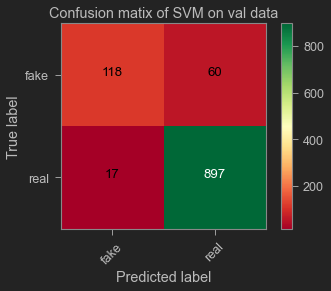

In [12]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('svm', LinearSVC())
])

fit = pipeline.fit(X_train['title'], y_train['label'])
print('SVM')
print('test:')
pred = pipeline.predict(X_test['title'])
print_metrices(pred, y_test['label'])
plot_confusion_matrix(confusion_matrix(y_test['label'], pred), target_names=['fake', 'real'], normalize=False,
                      title='Confusion matix of SVM on val data')

#val_ori = pd.read_csv('data/Constraint_English_Val - Sheet1.csv')
#svm_val_misclass_df = val_ori[pred!=val['label']]

### Linear Support Vector Classification (SVC )w/ Gridsearch

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
from textblob import TextBlob
import pandas
import sklearn
import pickle
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import learning_curve

In [27]:
def split_into_tokens(title):
    title = str(title, 'utf8')  # convert bytes into proper unicode
    return TextBlob(title).words

In [29]:
def split_into_lemmas(title):
    title = title.lower()
    words = TextBlob(title).words
    # for each word, take its "base form" = lemma 
    return [word.lemma for word in words]

CoAID_df.title.head().apply(split_into_lemmas)

0    [facebook, post, shared, in, at, least, three,...
1    [wisconsin, is, òclearly, seeing, a, decline, ...
2    [facebook, post, claim, a, child, who, is, inf...
3    [indiaõs, ministry, of, home, affair, banning,...
4    [42, democratic, senator, plus, two, independe...
Name: title, dtype: object

In [31]:
pipeline_svm = Pipeline([
    ('bow', CountVectorizer(analyzer=split_into_lemmas)),
    ('tfidf', TfidfTransformer()),
    ('classifier', LinearSVC()),  # <== change here
])

# pipeline parameters to automatically explore and tune
param_svm = [
  {'classifier__C': [1, 10, 100, 1000], 'classifier__kernel': ['linear']},
  {'classifier__C': [1, 10, 100, 1000], 'classifier__gamma': [0.001, 0.0001], 'classifier__kernel': ['rbf']},
]

grid_svm = GridSearchCV(
    pipeline_svm,  # pipeline from above
    param_grid=param_svm,  # parameters to tune via cross validation
    refit=True,  # fit using all data, on the best detected classifier
    n_jobs=-1,  # number of cores to use for parallelization; -1 for "all cores"
    scoring='accuracy',  # what score are we optimizing?
    cv=StratifiedKFold(),  # what type of cross validation to use
)


In [33]:
%time svm_detector = grid_svm.fit(X_train['title'], y_train['label']) # find the best combination from param_svm
print (svm_detector.cv_results_)

Wall time: 24.5 s
{'mean_fit_time': array([5.25157814, 5.27134633, 3.60895119, 2.50031428, 2.53801427,
       2.567733  , 2.78395801, 2.57332034, 2.61820011, 2.6676682 ,
       2.76500735, 2.69639111]), 'std_fit_time': array([0.06967941, 0.09448458, 1.35737913, 0.05628751, 0.08232752,
       0.04337939, 0.07137815, 0.04570927, 0.09511753, 0.04099198,
       0.09174247, 0.05674684]), 'mean_score_time': array([0.50941992, 0.49962544, 0.52260346, 0.54514236, 0.60697737,
       0.56788144, 0.57127142, 0.57147198, 0.59879889, 0.65046177,
       0.57625957, 0.4952786 ]), 'std_score_time': array([0.03461231, 0.03080862, 0.02661955, 0.02888907, 0.03259077,
       0.01558628, 0.01584973, 0.02960597, 0.01174318, 0.03088405,
       0.01683553, 0.03248879]), 'param_classifier__C': masked_array(data=[1, 10, 100, 1000, 1, 1, 10, 10, 100, 100, 1000, 1000],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False],
       fill_value='?',


## Logistic Regression

Logistic Regression
test:
[[119  59]
 [ 17 897]]
              precision    recall  f1-score   support

        fake       0.88      0.67      0.76       178
        real       0.94      0.98      0.96       914

    accuracy                           0.93      1092
   macro avg       0.91      0.82      0.86      1092
weighted avg       0.93      0.93      0.93      1092

Accuracy :  0.9304029304029304
Precison :  0.9424360500873175
Recall :  0.9304029304029304
F1 :  0.9342759401208258


C:\Users\samga\anaconda3.1\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


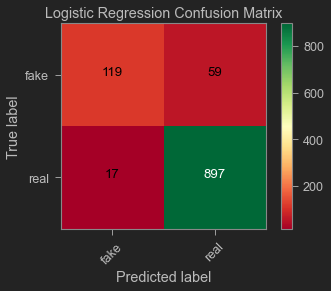

In [13]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('c', LogisticRegression(C=50))
])
fit = pipeline.fit(X_train['title'], y_train['label'])
print('Logistic Regression')
print('test:')
pred = pipeline.predict(X_test['title'])
print_metrices(pred, y_test['label'])
plot_confusion_matrix(confusion_matrix(y_test['label'], pred), target_names=['fake', 'real'], normalize=False,
                      title='Logistic Regression Confusion Matrix')

In [62]:
y_test['predictions'] = pred

<ipython-input-62-e82774ebede9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['predictions'] = pred


In [64]:
y_test['label'] != pred 

447     False
3196    False
3853    False
1953    False
4359    False
        ...  
3982    False
2705    False
3093    False
2869    False
3505    False
Name: label, Length: 1092, dtype: bool

In [66]:
mask = (y_test['label'] == 'fake') & (pred == 'real')
False_Positives_df = pd.DataFrame(y_test[mask])
False_Positives_df

,type,news_url,title,label,predictions
705,post,https://www.youtube.com/watch?v=eQVYMWY9g24,House Resolution 6666 includes billions of dol...,fake,real
313,article,https://www.c-span.org/video/?470426-1/preside...,The WHO coronavirus test Òwas a bad test.Ó,fake,real
566,article,https://www.whitehouse.gov/briefings-statement...,US President Donald Trump has suggested studyi...,fake,real
906,post,https://www.facebook.com/groups/recallgovpritz...,If face masks work to protect us from viral re...,fake,real
72,post,https://www.youtube.com/watch?v=E95qChFdMOo,The number of deaths from COVID-19 are exagger...,fake,real
645,article,https://www.rev.com/blog/transcripts/transcrip...,“If you look at the one (hydroxychloroquine) s...,fake,real
308,post,https://www.instagram.com/p/B92C5PCHXlv/?utm_s...,"ÒWhile all COVID-19 news has been going on, th...",fake,real
867,post,https://www.facebook.com/967005203392813/posts...,Wearing a face mask to slow the spread of COVI...,fake,real
684,post,https://twitter.com/RepJanel/status/1260224025...,Wisconsin Governor Tony Evers’ administration ...,fake,real
169,article,https://www.nsemwoha.com/boil-weed-and-ginger-...,"Boil weed and ginger for COVID-19 victims, and...",fake,real


In [71]:
print(False_Positives_df.values)

[['post' 'https://www.youtube.com/watch?v=eQVYMWY9g24'
  'House Resolution 6666 includes billions of dollars to fund forced quarantining for Americans who test positive for COVID-19.'
  'fake' 'real']
 ['article'
  'https://www.c-span.org/video/?470426-1/president-trump-urges-states-follow-coronavirus-guidelines&start=4920'
  'The WHO coronavirus test Òwas a bad test.Ó' 'fake' 'real']
 ['article'
  'https://www.whitehouse.gov/briefings-statements/remarks-president-trump-vice-president-pence-members-coronavirus-task-force-press-briefing-31/'
  'US President Donald Trump has suggested studying the injection of disinfectant as a COVID-19 treatment.'
  'fake' 'real']
 ['post'
  'https://www.facebook.com/groups/recallgovpritzker/permalink/643374242993384/'
  'If face masks work to protect us from viral respiratory illnesses like COVID-19 and the flu and we’ve been walking around in them for months, then why would anyone need a flu shot right now?'
  'fake' 'real']
 ['post' 'https://www.yout

### LogReg #2

In [16]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.multioutput import MultiOutputClassifier

Logistic Regression
test:
[[118  60]
 [ 16 898]]
              precision    recall  f1-score   support

        fake       0.88      0.66      0.76       178
        real       0.94      0.98      0.96       914

    accuracy                           0.93      1092
   macro avg       0.91      0.82      0.86      1092
weighted avg       0.93      0.93      0.93      1092

Accuracy :  0.9304029304029304
Precison :  0.9432795054706397
Recall :  0.9304029304029304
F1 :  0.9344925018001942
['fake' 'real' 'real' ... 'real' 'real' 'real']


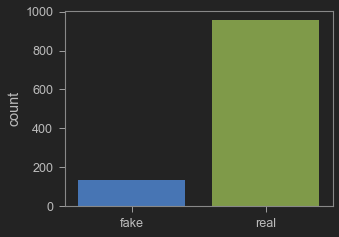

[[ 0.3532726  -0.63245529 -1.9614379  ... -0.49065808  0.70593067
  -0.05905177]]
[3.05618001]
Coefficients close to zero will contribute little to the end result
Number of errors: title    5457
label     925
dtype: int64


In [14]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('lr', LogisticRegression(solver='lbfgs', C=25, max_iter=1000))
])
fit = pipeline.fit(X_train['title'], y_train['label'])
print('Logistic Regression')
print('test:')
y_pred_prob=pipeline.predict_proba(X_test['title'])
pred = pipeline.predict(X_test['title'])
print_metrices(pred, y_test['label'])

_pred_prob=pipeline.predict_proba(X_test['title'])
predictions=pipeline.predict(X_test['title'])
print(predictions)

sns.countplot(x=pred, orient='h')
plt.show()

#print(predictions[:,0])
print(pipeline['lr'].coef_)
print(pipeline['lr'].intercept_)
print('Coefficients close to zero will contribute little to the end result')

num_err = np.sum(y_test['label']!= pipeline.predict(X_test['title']))
print("Number of errors:", num_err)


### Log Reg #3 w/ Grid Search

In [17]:
pipeline = Pipeline([('vect', CountVectorizer()), 
                     ('tfidf', TfidfTransformer()),
                     ('logreg', LogisticRegression())])

pipe_params = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__max_features': (None, 5000, 10000, 50000),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'logreg__max_iter': (100,200,500),
    'logreg__penalty': ('l2', 'elasticnet'),
}

gs = GridSearchCV(pipeline, param_grid=pipe_params, cv=3)
gs.fit(X_train['title'], y_train['label'])
print('Logistic Regression')
print('test:')
pred = gs.predict(X_test['title'])
print_metrices(pred, y_test['label'])

gs.best_params_


C:\Users\samga\anaconda3.1\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\samga\anaconda3.1\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\samga\anaconda3.1\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\samga\anaconda3.1\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\samga\anaconda3.1\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penal

Logistic Regression
test:
[[ 80  98]
 [ 20 894]]
              precision    recall  f1-score   support

        fake       0.80      0.45      0.58       178
        real       0.90      0.98      0.94       914

    accuracy                           0.89      1092
   macro avg       0.85      0.71      0.76      1092
weighted avg       0.88      0.89      0.88      1092

Accuracy :  0.891941391941392
Precison :  0.9297042462041356
Recall :  0.891941391941392
F1 :  0.9048896302627422


{'logreg__max_iter': 100,
 'logreg__penalty': 'l2',
 'tfidf__norm': 'l2',
 'tfidf__use_idf': False,
 'vect__max_df': 0.75,
 'vect__max_features': 5000,
 'vect__ngram_range': (1, 2)}

C:\Users\samga\anaconda3.1\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\samga\anaconda3.1\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\samga\anaconda3.1\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\samga\anaconda3.1\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\samga\anaconda3.1\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penal

Logistic Regression
test:
[[ 80  98]
 [ 20 894]]
              precision    recall  f1-score   support

        fake       0.80      0.45      0.58       178
        real       0.90      0.98      0.94       914

    accuracy                           0.89      1092
   macro avg       0.85      0.71      0.76      1092
weighted avg       0.88      0.89      0.88      1092

Accuracy :  0.891941391941392
Precison :  0.9297042462041356
Recall :  0.891941391941392
F1 :  0.9048896302627422


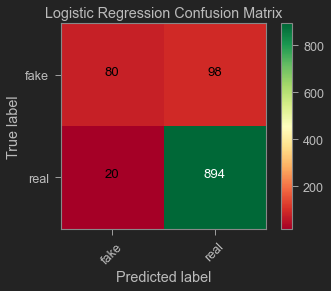

In [18]:
fit = gs.fit(X_train['title'], y_train['label'])
print('Logistic Regression')
print('test:')
pred = gs.predict(X_test['title'])
print_metrices(pred, y_test['label'])
plot_confusion_matrix(confusion_matrix(y_test['label'], pred), target_names=['fake', 'real'], normalize=False,
                      title='Logistic Regression Confusion Matrix')

## Gradient Boost

Gradient Boost
test:
[[ 75 103]
 [  7 907]]
              precision    recall  f1-score   support

        fake       0.91      0.42      0.58       178
        real       0.90      0.99      0.94       914

    accuracy                           0.90      1092
   macro avg       0.91      0.71      0.76      1092
weighted avg       0.90      0.90      0.88      1092

Accuracy :  0.8992673992673993
Precison :  0.9494645897788032
Recall :  0.8992673992673993
F1 :  0.9153511076587999


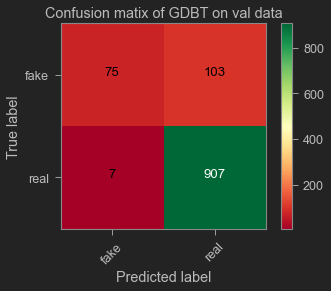

In [20]:
# minor variations in finla results due to randomness
pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('c', GradientBoostingClassifier())
])
fit = pipeline.fit(X_train['title'], X_train['label'])
print('Gradient Boost')
print('test:')
pred = pipeline.predict(X_test['title'])

print_metrices(pred, X_test['label'])
plot_confusion_matrix(confusion_matrix(X_test['label'], pred), target_names=['fake', 'real'], normalize=False,
                      title='Gradient Boost Confusion Matrix')

## Random Forests

Random Forest
test:
[[ 89  89]
 [  9 905]]
              precision    recall  f1-score   support

        fake       0.91      0.50      0.64       178
        real       0.91      0.99      0.95       914

    accuracy                           0.91      1092
   macro avg       0.91      0.75      0.80      1092
weighted avg       0.91      0.91      0.90      1092

Accuracy :  0.9102564102564102
Precison :  0.946165067609269
Recall :  0.9102564102564102
F1 :  0.921381310634797


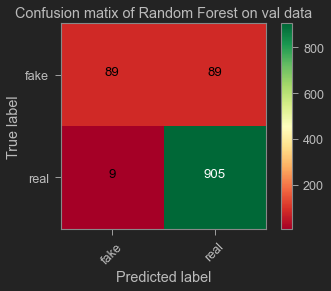

In [21]:
# minor variations in finla results due to randomness
pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('rf', RandomForestClassifier(n_estimators=20, random_state=42))
])
fit = pipeline.fit(X_train['title'], X_train['label'])
print('Random Forest')
print('test:')
pred = pipeline.predict(X_test['title'])

print_metrices(pred, X_test['label'])
plot_confusion_matrix(confusion_matrix(X_test['label'], pred), target_names=['fake', 'real'], normalize=False,
                      title='Confusion matix of Random Forest on val data')

## XG Boost

In [22]:
import pandas as pd
import numpy as np

import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss
from sklearn.preprocessing import LabelBinarizer

C:\Users\samga\anaconda3.1\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:56:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Random Forest
test:
[[103  75]
 [ 24 890]]
              precision    recall  f1-score   support

        fake       0.81      0.58      0.68       178
        real       0.92      0.97      0.95       914

    accuracy                           0.91      1092
   macro avg       0.87      0.78      0.81      1092
weighted avg       0.90      0.91      0.90      1092

Accuracy :  0.9093406593406593
Precison :  0.9277926699219693
Recall :  0.9093406593406593
F1 :  0.9156900324045386


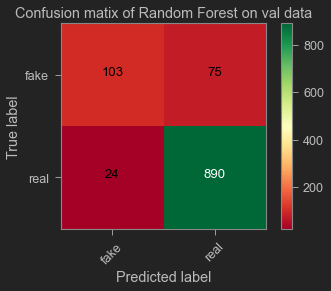

In [23]:
# minor variations in finla results due to randomness
pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('xb', xgb.XGBClassifier(n_estimators=500))
])
fit = pipeline.fit(X_train['title'], X_train['label'])
print('Random Forest')
print('test:')
pred = pipeline.predict(X_test['title'])

print_metrices(pred, X_test['label'])
plot_confusion_matrix(confusion_matrix(X_test['label'], pred), target_names=['fake', 'real'], normalize=False,
                      title='Confusion matix of Random Forest on val data')

## Stochastic Gradient Descent

In [23]:
sgd_pipeline = Pipeline([('vect', CountVectorizer()), 
                     ('tfidf', TfidfTransformer()),
                     ('sgd', SGDClassifier())
                    ])

sgd_pipe_params = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__max_features': (None, 5000, 10000, 50000),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
}

sgd_gs = GridSearchCV(sgd_pipeline, param_grid=sgd_pipe_params, cv=3)
sgd_gs.fit(X_train['title'], y_train['label'])
print("Best score:", sgd_gs.best_score_)
print("Train score", sgd_gs.score(X_train['title'], y_train['label']))
print("Test score", sgd_gs.score(X_test['title'], y_test['label']))

sgd_gs.best_params_

Best score: 0.9143184421534937
Train score 0.997709049255441
Test score 0.9221611721611722


{'tfidf__norm': 'l2',
 'tfidf__use_idf': True,
 'vect__max_df': 0.75,
 'vect__max_features': 10000,
 'vect__ngram_range': (1, 2)}

Stochastic Gradient Descent
test:
[[124  54]
 [ 30 884]]
              precision    recall  f1-score   support

        fake       0.81      0.70      0.75       178
        real       0.94      0.97      0.95       914

    accuracy                           0.92      1092
   macro avg       0.87      0.83      0.85      1092
weighted avg       0.92      0.92      0.92      1092

Accuracy :  0.9230769230769231
Precison :  0.9290230336133024
Recall :  0.9230769230769231
F1 :  0.9253588535901373


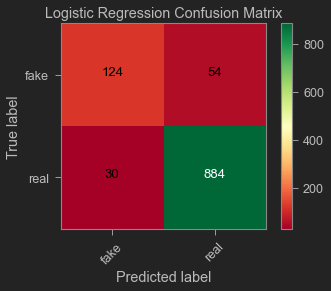

In [24]:
fit = sgd_gs.fit(X_train['title'], y_train['label'])
print('Stochastic Gradient Descent')
print('test:')
pred = sgd_gs.predict(X_test['title'])
print_metrices(pred, y_test['label'])
plot_confusion_matrix(confusion_matrix(y_test['label'], pred), target_names=['fake', 'real'], normalize=False,
                      title='Logistic Regression Confusion Matrix')